#Juan Carlos Apitz
#STAT510 Homework 4

##Problem 6.16

In [1]:
#PANDAS
import pandas as pd
from pandas import DataFrame, Series

#NUMPY
import numpy as np

#SCIPY t and F distributions
from scipy.stats import t
from scipy.stats import f

#STATMODELS
import statsmodels.api as sm
from statsmodels.formula.api import ols
#import statsmodels.api as sm

#SEABORN plotting
import seaborn as sns

#MATPLOTLIB plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = '~/Documents/LinearRegression/STAT510/Kutner/CH6DS/CH06PR15.txt'

patient = pd.read_table(filename, delim_whitespace=True, names=['satisfaction','age','severity', 'anxiety'])
patient.head()

,satisfaction,age,severity,anxiety
0,48,50,51,2.3
1,57,36,46,2.3
2,66,40,48,2.2
3,70,41,44,1.8
4,89,28,43,1.8


##a.

Test the following hypothesis:
$$H_o: \beta_1 = \beta_2 = \beta_3 = 0$$
$$H_a: \text{at least one } \beta_i = 0$$

To test the above hypothesis we fit the model and conduct an F test.

In [3]:
model = ols(formula="satisfaction ~ age + severity + anxiety", data=patient).fit()

In [4]:
dfn = model.df_model
dfd = model.df_resid
fcrit = f.ppf(0.1, dfn, dfd)
print 'The 10 percent critical F-value with 3 and 42 degrees of freedom is %.2f and the model F-statistic is %.2f' %(fcrit,model.fvalue)
print 'Therefore since the F-statistic is greater than the critical F-value we reject the null hypothesis at the 10 percent level. We can conclude that there exist a regression relation.' 
print 'The p-value of the test is %.11f.' %model.f_pvalue

The 10 percent critical F-value with 3 and 42 degrees of freedom is 0.19 and the model F-statistic is 30.05
Therefore since the F-statistic is greater than the critical F-value we reject the null hypothesis at the 10 percent level. We can conclude that there exist a regression relation.
The p-value of the test is 0.00000000015.


In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           satisfaction   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     30.05
Date:                Sat, 24 Oct 2015   Prob (F-statistic):           1.54e-10
Time:                        22:02:08   Log-Likelihood:                -169.36
No. Observations:                  46   AIC:                             346.7
Df Residuals:                      42   BIC:                             354.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    158.4913     18.126      8.744      0.000       121.912   195.071
age           -1.1416      0.215     -5.315      0.000        -1.575    -0.708
severity      -0.4420      0.492     -0.898      0.374        -1.435     0.551
anxiety      -13.4702      7.100     -1.897      0.065       -27.798     0.858
==============================================================================
Omnibus:                        5.219   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.074
Skew:                          -0.098   Prob(JB):                        0.354
Kurtosis:                       1.978   Cond. No.                         782.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##b.

In [6]:
g = 3; p = len(model.params); n = model.nobs; adj_alpha = 1-0.1/(2*g)
tcrit = t.ppf(adj_alpha, n-p)

b1 = model.params[1]; b1low = b1 - tcrit * model.bse[1]; b1high = b1 + tcrit * model.bse[1]
b2 = model.params[2]; b2low = b2 - tcrit * model.bse[2]; b2high = b2 + tcrit * model.bse[2]
b3 = model.params[3]; b3low = b3 - tcrit * model.bse[3]; b3high = b3 + tcrit * model.bse[3]

print 'The 90 percent joint CI for beta 1 is: (%.2f, %.2f)' %(b1low, b1high)
print 'The 90 percent joint CI for beta 2 is: (%.2f, %.2f)' %(b2low, b2high)
print 'The 90 percent joint CI for beta 3 is: (%.2f, %.2f)' %(b3low, b3high)

The 90 percent joint CI for beta 1 is: (-1.61, -0.67)
The 90 percent joint CI for beta 2 is: (-1.52, 0.64)
The 90 percent joint CI for beta 3 is: (-29.09, 2.15)


##c.

In [7]:
print 'The coefficient of multiple determination is: %.2f' %model.rsquared
print 'This coefficient measures the proportinate reduction of total variation associated with the model.'

The coefficient of multiple determination is: 0.68
This coefficient measures the proportinate reduction of total variation associated with the model.


##Problem 6.19

In [8]:
filename = '~/Documents/LinearRegression/STAT510/Kutner/CH6DS/CH06PR18.txt'

rental = pd.read_table(filename, delim_whitespace=True, names=['rate','age','opex', 'vacancy', 'sqf',])
rental.head()

,rate,age,opex,vacancy,sqf
0,13.5,1,5.02,0.14,123000
1,12.0,14,8.19,0.27,104079
2,10.5,16,3.00,0.00,39998
3,15.0,4,10.70,0.05,57112
4,14.0,11,8.97,0.07,60000


##a.

Test the following hypothesis:
$$H_o: \beta_1 = \beta_2 = \beta_3 = 0$$
$$H_a: \text{at least one } \beta_i = 0$$

To test the above hypothesis we fit the model and conduct an F test.

In [9]:
model = ols(formula="rate ~ age + opex + vacancy + sqf", data=rental).fit()

In [10]:
dfn = model.df_model
dfd = model.df_resid
fcrit = f.ppf(0.05, dfn, dfd)
print 'The 5 percent critical F-value with 4 and 76 degrees of freedom is %.2f and the model F-statistic is %.2f' %(fcrit,model.fvalue)
print 'Therefore since the F-statistic is greater than the critical F-value we reject the null hypothesis at the 5  percent level. We can conclude that there exist a regression relation.' 
print 'The p-value of the test is %.11f.' %model.f_pvalue
print ''
print 'The results of the test imply that at least one of the beta parameters is non-zero, which is an indication that at   least one of the explanatory variables influences the rental rate.'

The 5 percent critical F-value with 4 and 76 degrees of freedom is 0.18 and the model F-statistic is 26.76
Therefore since the F-statistic is greater than the critical F-value we reject the null hypothesis at the 5  percent level. We can conclude that there exist a regression relation.
The p-value of the test is 0.00000000000.

The results of the test imply that at least one of the beta parameters is non-zero, which is an indication that at   least one of the explanatory variables influences the rental rate.


In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     26.76
Date:                Sat, 24 Oct 2015   Prob (F-statistic):           7.27e-14
Time:                        22:02:09   Log-Likelihood:                -122.75
No. Observations:                  81   AIC:                             255.5
Df Residuals:                      76   BIC:                             267.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.2006      0.578     21.110      0.000        11.049    13.352
age           -0.1420      0.021     -6.655      0.000        -0.185    -0.100
opex           0.2820      0.063      4.464      0.000         0.156     0.408
vacancy        0.6193      1.087      0.570      0.570        -1.545     2.784
sqf         7.924e-06   1.38e-06      5.722      0.000      5.17e-06  1.07e-05
==============================================================================
Omnibus:                        1.922   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.301
Skew:                           0.148   Prob(JB):                        0.522
Kurtosis:                       3.545   Cond. No.                     1.74e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##b.

In [12]:
g = 4; p = len(model.params); n = model.nobs; adj_alpha = 1-0.05/(2*g)
tcrit = t.ppf(adj_alpha, n-p)

b1 = model.params[1]; b1low = b1 - tcrit * model.bse[1]; b1high = b1 + tcrit * model.bse[1]
b2 = model.params[2]; b2low = b2 - tcrit * model.bse[2]; b2high = b2 + tcrit * model.bse[2]
b3 = model.params[3]; b3low = b3 - tcrit * model.bse[3]; b3high = b3 + tcrit * model.bse[3]
b4 = model.params[4]; b4low = b4 - tcrit * model.bse[4]; b4high = b4 + tcrit * model.bse[4]

print 'The 90 percent joint CI for beta 1 is: (%.2f, %.2f)' %(b1low, b1high)
print 'The 90 percent joint CI for beta 2 is: (%.2f, %.2f)' %(b2low, b2high)
print 'The 90 percent joint CI for beta 3 is: (%.2f, %.2f)' %(b3low, b3high)
print 'The 90 percent joint CI for beta 4 is: (%.7f, %.7f)' %(b4low, b4high)
print ''
print 'The above results indicate that with the exception of beta 3 (since its confidence interval contains 0), all the coefficients are significant. This means that there exist a linear relation between rental rates and the variables age, operating expense, and square footage.'

The 90 percent joint CI for beta 1 is: (-0.20, -0.09)
The 90 percent joint CI for beta 2 is: (0.12, 0.44)
The 90 percent joint CI for beta 3 is: (-2.16, 3.40)
The 90 percent joint CI for beta 4 is: (0.0000044, 0.0000115)

The above results indicate that with the exception of beta 3 (since its confidence interval contains 0), all the coefficients are significant. This means that there exist a linear relation between rental rates and the variables age, operating expense, and square footage.


##c.

In [13]:
print 'The R-squared of the model is: %.2f' %model.rsquared
print 'This coefficient measures the proportinate reduction of total variation associated with the model. Therefore, our model "explains" approximatle 58 percent of the variation in the data.'

The R-squared of the model is: 0.58
This coefficient measures the proportinate reduction of total variation associated with the model. Therefore, our model "explains" approximatle 58 percent of the variation in the data.


##Problem 7.5

##a.

###Fit the full and partial models:

In [14]:
model1 = ols(formula="satisfaction ~ age ", data=patient).fit()
model2 = ols(formula="satisfaction ~ age + severity", data=patient).fit()
modelf = ols(formula="satisfaction ~ age + severity + anxiety", data=patient).fit()

###Calculate the appropriate sum of squares:

In [15]:
SSRF = modelf.ess
SSRX1 = model1.ess
SSRX2GX1 = model2.ess - model1.ess
SSRX3GX1X2 = modelf.ess - model2.ess
SSE = modelf.ssr
SST = modelf.centered_tss

###Create the ANOVA table dataframe:

In [16]:
SS = Series([SSRF, SSRX1, SSRX2GX1, SSRX3GX1X2, SSE, SST])
DF = Series([modelf.df_model, 1, 1, 1, modelf.df_resid, modelf.df_model + modelf.df_resid ])

aovtbl = DataFrame()
aovtbl['SS'] = SS
aovtbl['df'] = DF
aovtbl['MS'] = SS/DF

aovtbl.index = ['Full Model', 'X1', 'X2 given X1', 'X3 given X2, X1', 'Error', 'Total']

aovtbl.loc['Total','MS'] = 'NA'

###The ANOVA table that decomposes the regression sum of squares:

In [17]:
aovtbl

,SS,df,MS
Full Model,9120.463666,3,3040.155
X1,8275.388851,1,8275.389
X2 given X1,480.915294,1,480.9153
"X3 given X2, X1",364.159521,1,364.1595
Error,4248.840682,42,101.1629
Total,13369.304348,45,NA


##b.

Test the following hypothesis:
$$H_o: \beta_3 = 0$$
$$H_a: \beta_3 \neq 0$$

To test the above hypothesis we calculate the F-value and compare it with $F_{0.975,1,42}$

In [18]:
fcrit = f.ppf(0.975,aovtbl.loc['X3 given X2, X1','df'],aovtbl.loc['Error','df'])
print 'The F-critical value is: %.2f' %fcrit

The F-critical value is: 5.40


In [19]:
fvalue = aovtbl.loc['X3 given X2, X1','MS']/aovtbl.loc['Error','MS']
pvalue = 1 - f.cdf(fvalue,aovtbl.loc['X3 given X2, X1','df'],aovtbl.loc['Error','df'])

print 'The calculated F-value for the test is: %.2f.' %fvalue
print ''
print 'Since the F-value is smaller than the F-critical value we fail to reject the null hypothesis. We conclude that the   variable anxiety can be dropped from the model'
print ''
print 'The pvalue of the test is: %.4f' %pvalue

The calculated F-value for the test is: 3.60.

Since the F-value is smaller than the F-critical value we fail to reject the null hypothesis. We conclude that the   variable anxiety can be dropped from the model

The pvalue of the test is: 0.0647


##Problem 7.6

Test the following hypothesis:
$$H_o: \beta_2 = \beta_3 = 0$$
$$H_a: \beta_2 \neq 0 \text{ or }\beta_3 \neq 0 \text{ or both.}$$

To test the above hypothesis we calculate the F-value and compare it with $F_{0.975,2,42}$

In [20]:
fcrit = f.ppf(0.975,aovtbl.loc['X3 given X2, X1','df'] + aovtbl.loc['X2 given X1','df'], aovtbl.loc['Error','df'])
print 'The F-critical value is: %.2f' %fcrit

The F-critical value is: 4.03


In [21]:
fvalue = ((aovtbl.loc['X3 given X2, X1','SS'] + aovtbl.loc['X2 given X1','SS'])/2)/aovtbl.loc['Error','MS']
pvalue = 1 - f.cdf(fvalue,aovtbl.loc['X3 given X2, X1','df'] + aovtbl.loc['X2 given X1','df'],aovtbl.loc['Error','df'])

print 'The calculated F-value for the test is: %.2f.' %fvalue
print ''
print 'Since the F-value is greater than the F-critical value we reject the null hypothesis. We conclude that one or both of the variables anxiety or severity cannot be dropped from the model'
print ''
print 'The pvalue of the test is: %.4f' %pvalue

The calculated F-value for the test is: 4.18.

Since the F-value is greater than the F-critical value we reject the null hypothesis. We conclude that one or both of the variables anxiety or severity cannot be dropped from the model

The pvalue of the test is: 0.0222


##Problem 7.10

Test the following hypothesis:
$$H_o: \beta_1 = -0.1, \ \ \beta_2 = 0.4$$
$$H_a: \text{not both equalities in } H_o \text{ hold}$$

To test the above hypothesis we calculate the F-value and compare it with $F_{0.99,2,76}$

In [22]:
rental['mod_dep'] = rental['rate'] + 0.1*rental['age'] - 0.4*rental['opex']
rental.head()

,rate,age,opex,vacancy,sqf,mod_dep
0,13.5,1,5.02,0.14,123000,11.592
1,12.0,14,8.19,0.27,104079,10.124
2,10.5,16,3.00,0.00,39998,10.900
3,15.0,4,10.70,0.05,57112,11.120
4,14.0,11,8.97,0.07,60000,11.512


###Fit the full and reduced model

In [23]:
modelf = ols(formula="rate ~ age + opex + vacancy + sqf", data=rental).fit()
modelr = ols(formula="mod_dep ~ vacancy + sqf ", data=rental).fit()

In [24]:
fcrit = f.ppf(0.99, modelr.df_resid - modelf.df_resid, modelf.df_resid)
print 'The F-critical value is: %.2f' %fcrit

The F-critical value is: 4.90


In [25]:
fvalue = ((modelr.ssr - modelf.ssr)/(modelr.df_resid - modelf.df_resid))/modelf.mse_resid
pvalue = 1 - f.cdf(fvalue, modelr.df_resid - modelf.df_resid, modelf.df_resid)

print 'The calculated F-value for the test is: %.2f.' %fvalue
print ''
print 'Since the F-value is smaller than the F-critical value we fail to reject the null hypothesis. We conclude that one or both of the equalities in the null hypothesis do not hold.'
print ''
print 'The pvalue of the test is: %.4f' %pvalue

The calculated F-value for the test is: 4.61.

Since the F-value is smaller than the F-critical value we fail to reject the null hypothesis. We conclude that one or both of the equalities in the null hypothesis do not hold.

The pvalue of the test is: 0.0129


##Problem 14.4

##a.

###Create the mean response function:

In [26]:
def mrf(beta, X):
    prob = np.exp(np.dot(X,beta))/(1 + np.exp(np.dot(X,beta)))
    return prob

###Set up the design matrix and the coefficients vector:

In [27]:
X = np.hstack((np.ones(1000).reshape(1000,1),np.linspace(90,160,1000).reshape(1000,1)))

beta = np.array([[-25],[0.2]])

###Calculate the values for the mean response function:

In [28]:
Y = mrf(beta,X)

###Plot the function:

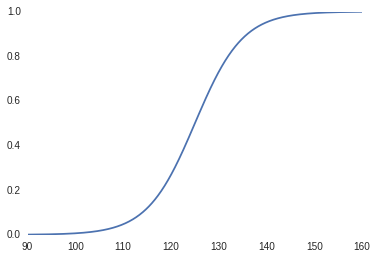

In [29]:
plt.plot(X[:,1],Y)

##b.

Solving the equation below for $X_i$:

$$\frac{e^{-25 + 0.2X_i}}{1+e^{-25 + 0.2X_i}}=0.5$$

We obtain the solution $X_i = 125$

##c.

####Odds when X = 150:

In [30]:
odds1 = mrf(beta,np.array([[1,150]]))[0][0]/(1-mrf(beta,np.array([[1,150]]))[0][0])

print 'The odds when X = 150 are: %.2f' %odds1

The odds when X = 150 are: 148.41


####Odds when X = 151

In [31]:
odds2 = mrf(beta,np.array([[1,151]]))[0][0]/(1-mrf(beta,np.array([[1,151]]))[0][0])

print 'The odds when X = 151 are: %.2f' %odds2

The odds when X = 151 are: 181.27


####Ratio of the odds:

In [32]:
oddsratio = odds2/odds1

print 'The ratio of the odds is: %.3f' %oddsratio

The ratio of the odds is: 1.221


####Calculate:

$e^{0.2}$

In [33]:
print 'The result is %.3f, which means the two quantities match as they should.' %np.exp(beta[1])[0]

The result is 1.221, which means the two quantities match as they should.


##Problem 14.9

In [34]:
filename = '~/Documents/LinearRegression/STAT510/Kutner/CH14DS/CH14PR09.txt'

performance = pd.read_table(filename, delim_whitespace=True, names=['perform','stability',])
performance.insert(1,'intercept',1)
performance.head()

,perform,intercept,stability
0,0,1,474
1,0,1,432
2,0,1,453
3,1,1,481
4,1,1,619


##a.

####Fit the model to obtain MLEs for $\beta_0$ and $\beta_1$.

In [35]:
model = sm.Logit(performance['perform'], performance[['intercept','stability']]).fit()

Optimization terminated successfully.
         Current function value: 0.541514
         Iterations 6


####The MLEs are given below:

In [36]:
DataFrame(model.params, columns = ['MLEs'])

,MLEs
intercept,-10.308925
stability,0.018920


####The response function is given by:

$$\pi_i = \frac{e^{-10.309+0.019X_i}}{1 + e^{-10.309+0.019X_i}}$$

##c.

In [37]:
ans1 = np.exp(model.params[1])

print 'The value of exp(b1) is %.3f.' %ans1
print ''
print 'This value means that the chance of performance increases by about 1.9 percent given a unit change in the stability  score.'

The value of exp(b1) is 1.019.

This value means that the chance of performance increases by about 1.9 percent given a unit change in the stability  score.


##d.

In [38]:
ans2 = model.predict(exog=np.array([1,550]))[0]

print 'The estimated probability of performance given a stability score of 550 is %.3f.' %ans2

The estimated probability of performance given a stability score of 550 is 0.524.


##e.

Solving the equation below for $X_i$:

$$\frac{e^{-10.309 + 0.019X_i}}{1+e^{-10.309 + 0.019X_i}}=0.7$$

We obtain the solution $X_i = \frac{\ln \left(\frac{7}{3} \right) - b_0}{b_1}\biggr{|}_{b_0=-10.309, b_1=0.019} = 582$

In [39]:
ans3 = (np.log(7/3)-model.params[0])/model.params[1]

print 'We verify this numerically and obtain %.2f.' %ans3

We verify this numerically and obtain 581.51.


##Problem 14.20

##b.

##c.